1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_6821/2532719875.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  G = 1/N*1/np.sqrt(4*np.pi)*np.sum(np.e**((-(y-x[i])**2)/2/std_x[i]**2) for i in range(len(x)))


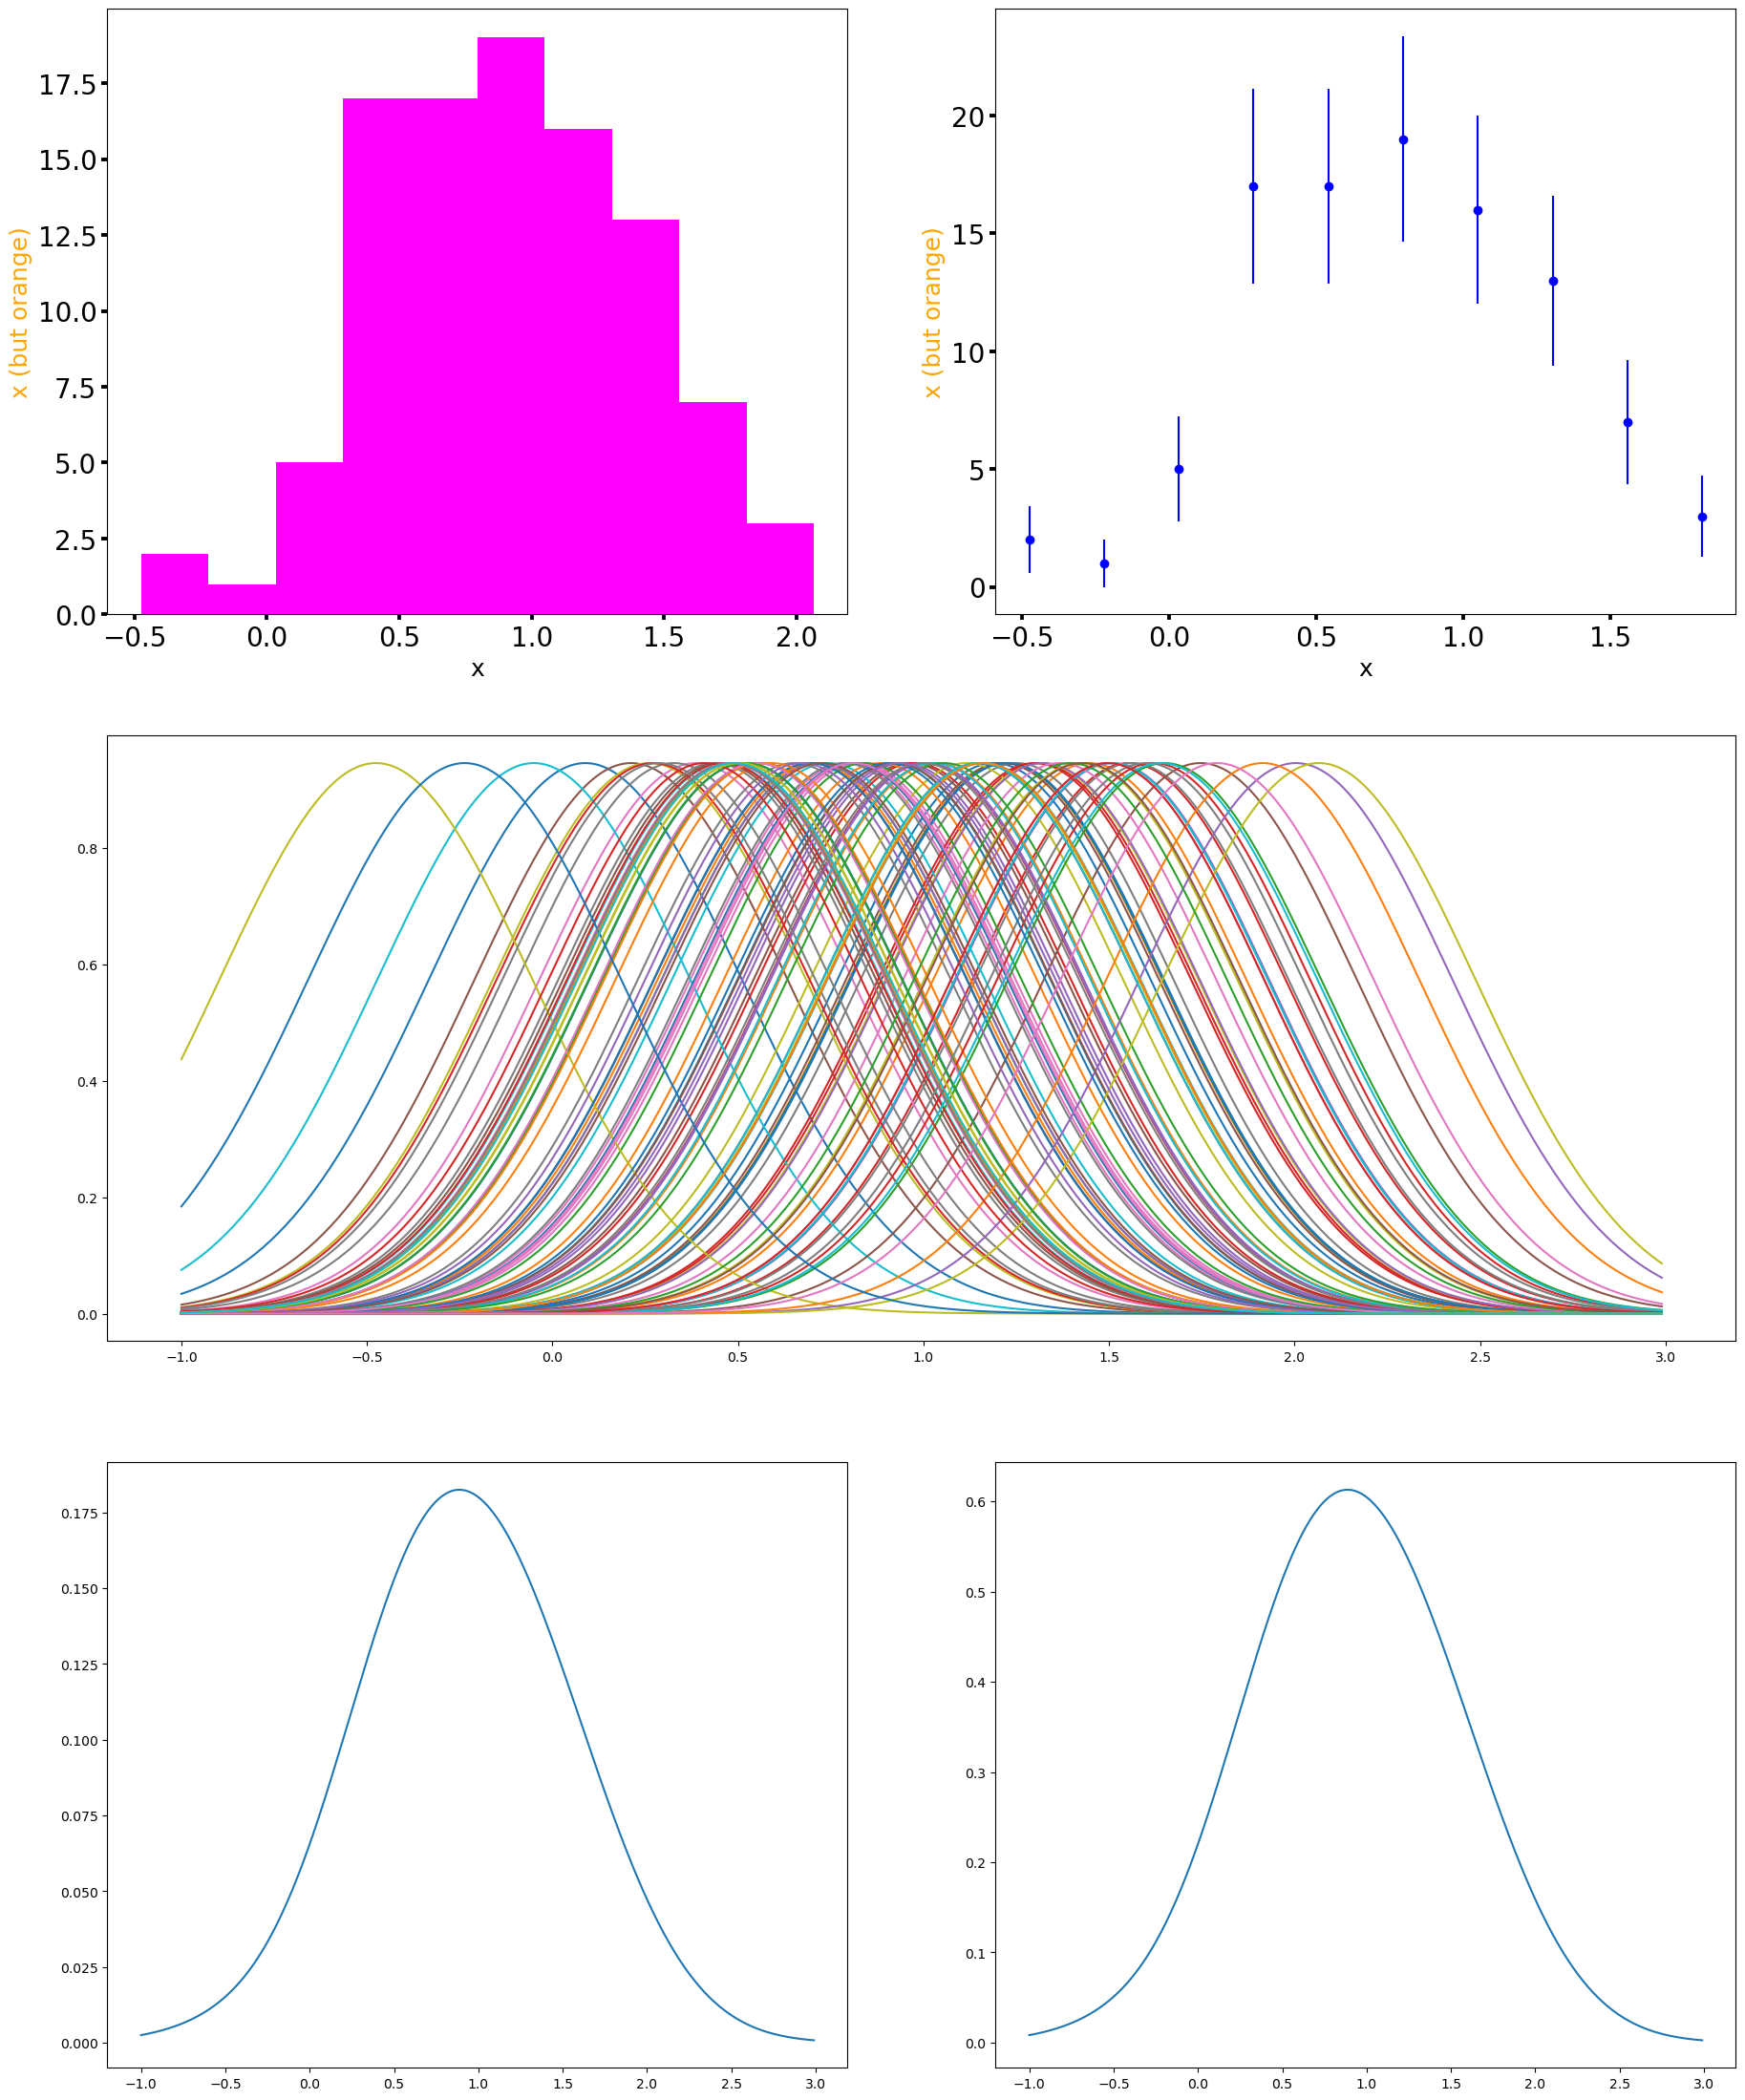

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import trapezoid

N = 100
mean = 1
std = 0.5
x = np.random.normal(mean, std, N)

gridsize = (3, 2)
fig = plt.figure(figsize = (22,28), facecolor='white')
ax0 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax1 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=1)
p = ax0.hist(x, color = 'magenta', bins = int(np.sqrt(N)))
ax1.errorbar(p[1][:-1],p[0], yerr = np.sqrt(p[0]), fmt="ob")
err = np.sqrt(abs(p[1]))
ax1.set_facecolor((1, 1, 1))
ax1.set_xlabel('x',fontsize = 18)
ax1.set_ylabel('x (but orange)',fontsize = 18, color = 'orange')
ax1.tick_params(which='both', width=2.75, length=4.5, labelsize=20)

ax0.set_xlabel('x',fontsize = 18)
ax0.set_ylabel('x (but orange)',fontsize = 18, color = 'orange')
ax0.tick_params(which='both', width=2.75, length=4.5, labelsize=20)



mean, var = norm.stats(x)
std_x = 1.06*np.sqrt(var)*len(x)**(-1/5)
y = np.arange(-1,3,0.01)

for i in range(len(mean)):
    gauss = norm.pdf(y, mean[i], std_x[i])
    f = ax2.plot(y, gauss)

G = 1/N*1/np.sqrt(4*np.pi)*np.sum(np.e**((-(y-x[i])**2)/2/std_x[i]**2) for i in range(len(x)))
ax3.plot(y,G)
ax4.plot(y,G/trapezoid(G,y))
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

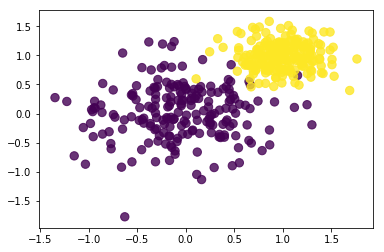

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot